# CS 109A/AC 209A/STAT 121A Data Science: Homework 1
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Tuesday, September 13th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW1.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid running your notebook on Vocareum and avoid changing your file after submitting.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Last: Zhang] 
[First: Linying]


### Part (b): Course Number

[AC 209a]

---

## Problem 1: Basic Data Visualization, Manipulation and Analysis

In this problem, we will be using some basic tools of data visualization and statistical analysis to help build our intuition for finding, describing and interpreting patterns in data. We will be working with the data contained in the file `dataset_HW1.txt`. The data in `dataset_HW1.txt` contains biometric readings for a number of diabetic patients. In this problem, we will try to detect disease subtypes within this set of patients using their biometric readings.

### Part (a): Understanding a Pandas Dataframe
Load the data from `dataset_HW1.txt` into a pandas dataframe. Get a basic picture of the information contained in the dataframe by printing the head, the size of the dataframe, the range of values in numeric-valued columns. Store the max, min and range information as a pandas dataframe.

<b>Solution:</b>

In [2]:
# Read data into a pandas dataframe
df = pd.read_csv('dataset_HW1.txt')

# Find the head of the table
df.head()

# Find the size of the dataframe
size = df.shape[0]
print "Number of patients:", size

# Find the max, min and range of each numeric-valued column
column_max = [df['marker_1'].max(), df['marker_2'].max(), df['subtype'].max(), df['patient_age'].max()]
column_min = [df['marker_1'].min(), df['marker_2'].min(), df['subtype'].min(), df['patient_age'].min()]
column_range = [df['marker_1'].max() - df['marker_1'].min(), df['marker_2'].max() - df['marker_2'].min(), df['subtype'].max() - df['subtype'].min(), df['patient_age'].max() - df['patient_age'].min()]


# Create a dataframe to store all the stats
column_names = df[range(1, 5)].columns.values
#stats = pd.DataFrame(columns=['marker_1', 'marker_2', 'subtype', 'patient_age'])
stats = pd.DataFrame(columns = column_names)


stats.loc['max'] = column_max
stats.loc['min'] = column_min
stats.loc['range'] = column_range

stats


Number of patients: 2300


,marker_1,marker_2,subtype,patient_age
max,80.209748,364.221777,3.0,90.0
min,-22.591722,-56.388949,0.0,3.0
range,102.801470,420.610725,3.0,87.0


### Part (b): Descriptive Statistics
Find the mean, median and standard deviation of the real-valued columns in the entire dataset. Now find the same set of descriptive statistics for each of the following subset of data:

1. children (ages 3 - 17)
2. adult males (ages 18 - 90)
3. adult females (ages 18 - 90)

Append these stats to the dataframe from part (a), containing the max, min and range. Explain what these stats say about the entire dataset as well as each of the above subsets.

Give a summary of the demographics of the patients contained in the dataset, i.e. how many children, how many adults, how many adult females and how many adult males. Display these results as pie charts.

**Solution:**

                        marker_1    marker_2   subtype  patient_age
max                    80.209748  364.221777  3.000000    90.000000
min                   -22.591722  -56.388949  0.000000     3.000000
range                 102.801470  420.610725  3.000000    87.000000
mean                   31.970053  105.974247  1.086957    38.868261
median                 33.743705  105.179291  1.000000    35.000000
std                    18.096490   52.306201  0.928643    27.211950
children_mean          26.267379  121.396907  1.500000    10.106250
children_median        26.868357  121.799063  1.500000    10.000000
children_std           24.972128   23.658433  1.118733     4.307337
children_max           80.209748  171.429357  3.000000    17.000000
children_min          -22.591722   70.538569  0.000000     3.000000
children_range        102.801470  100.890788  3.000000    14.000000
adult_males_mean       24.678005  124.883059  1.285714    53.744286
adult_males_median     26.168875  110.893774  1.

([<matplotlib.patches.Wedge at 0x114a27b10>,
  <matplotlib.text.Text at 0x114a41350>])

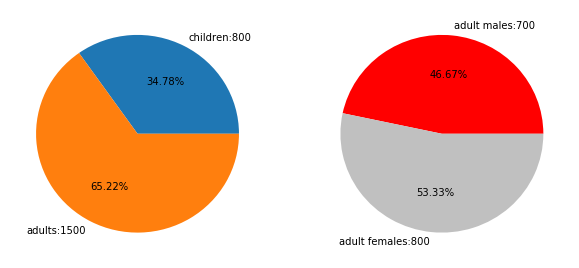

In [3]:
# Stats of entire dataset
# Calculate mean of each real-valued column
stats.loc['mean'] = df[range(1,5)].mean()
stats.loc['median'] = df[range(1,5)].median()
stats.loc['std'] = df[range(1,5)].std()

# Find patients within each group
children = df[(df['patient_age'] > 2) & (df['patient_age'] < 18)]
adult_males = df[(df['patient_age'] > 17) & (df['patient_age'] < 91) & (df['patient_gender'] == 'male')]
adult_females = df[(df['patient_age'] > 17) & (df['patient_age'] < 91) & (df['patient_gender'] == 'female')]

# Compute stats for the subgroups
stats.loc['children_mean'] = children[range(1,5)].mean()
stats.loc['children_median'] = children[range(1,5)].median()
stats.loc['children_std'] = children[range(1,5)].std()
stats.loc['children_max'] = children[range(1,5)].max()
stats.loc['children_min'] = children[range(1,5)].min()
stats.loc['children_range'] = children[range(1,5)].max() - children[range(1, 5)].min()

stats.loc['adult_males_mean'] = adult_males[range(1,5)].mean()
stats.loc['adult_males_median'] = adult_males[range(1,5)].median()
stats.loc['adult_males_std'] = adult_males[range(1,5)].std()
stats.loc['adult_males_max'] = adult_males[range(1,5)].max()
stats.loc['adult_males_min'] = adult_males[range(1,5)].min()
stats.loc['adult_males_range'] = adult_males[range(1,5)].max() - adult_males[range(1, 5)].min()

stats.loc['adult_females_mean'] = adult_females[range(1,5)].mean()
stats.loc['adult_females_median'] = adult_females[range(1,5)].median()
stats.loc['adult_females_std'] = adult_females[range(1,5)].std()
stats.loc['adult_females_max'] = adult_females[range(1,5)].max()
stats.loc['adult_females_min'] = adult_females[range(1,5)].min()
stats.loc['adult_females_range'] = adult_females[range(1,5)].max() - adult_females[range(1, 5)].min()

print stats

#Pie chart to show demographics of the patients

adults_number = df.shape[0] - children.shape[0]
children_number = children.shape[0]

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)
ax1.pie([children_number, adults_number], 
        labels = ['children:' + str(children_number), 'adults:' + str(adults_number)],
        autopct ='%.2f%%')

adult_males_number = adult_males.shape[0]
adult_females_number = adult_females.shape[0]

ax2 = fig.add_subplot(222)
ax2.pie([adult_males_number, adult_females_number], 
        labels = ['adult males:' + str(adult_males_number), 'adult females:' + str(adult_females_number)],
        colors = ['red', 'silver'],
        autopct ='%.2f%%')



### Part (c): Data Visualization
To understand how the biometric reading might help us determine diabetic subtypes, we begin with some visual analysis of the biometric data:

1. plot histograms of marker 1 and marker 2 (play with different values for the bin number to find the most usefule visualization)
2. plot both markers in a scatter plot, color each point according to disease subtype

Do the above for each demographics within the data: children, adult men and adult women.

**Solution:**

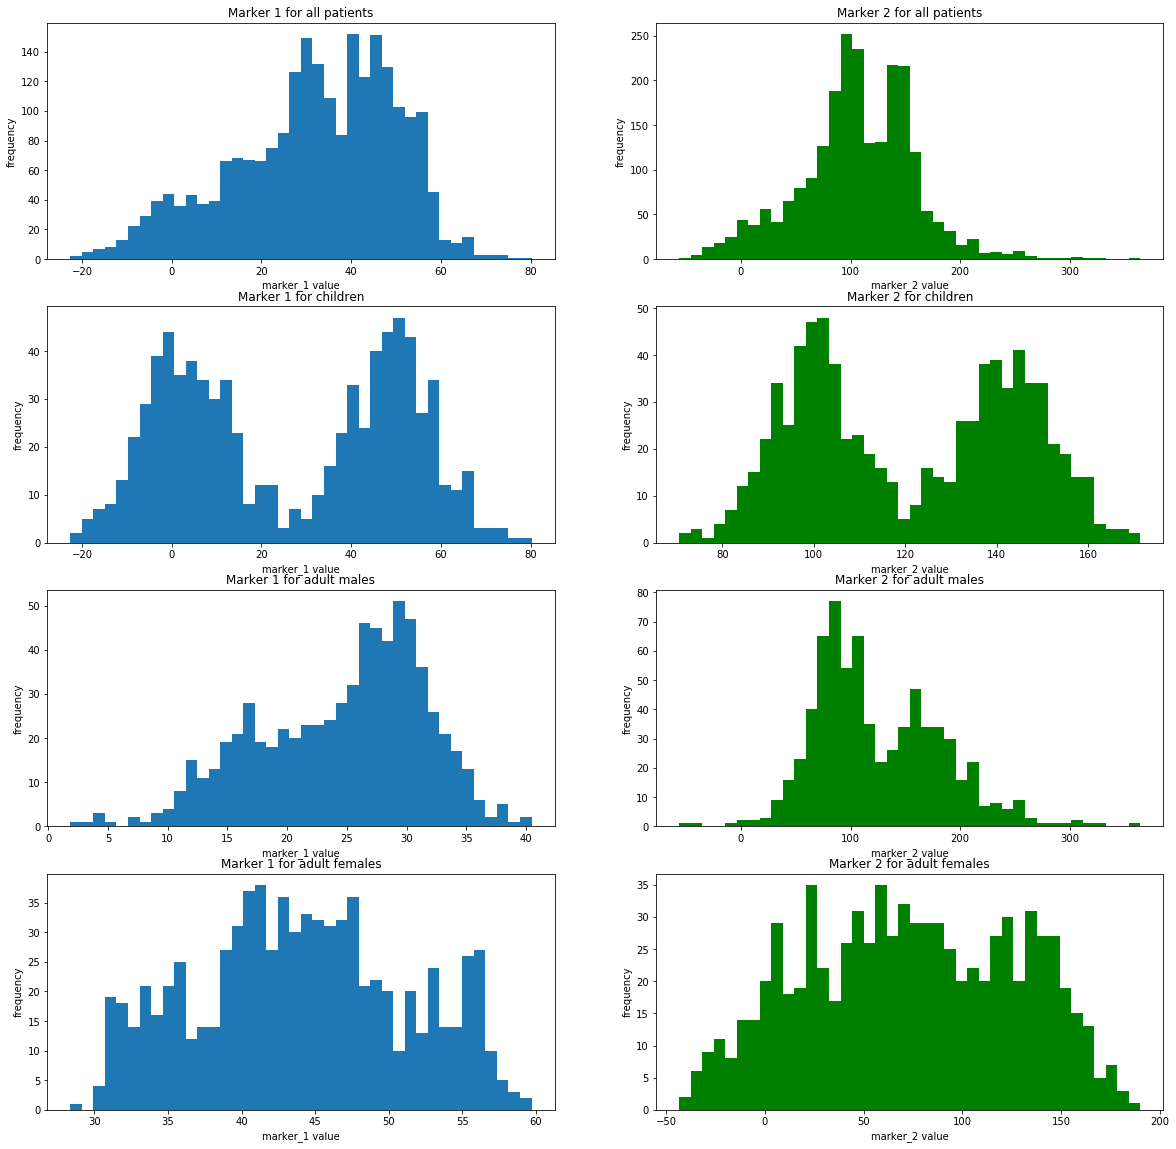

In [4]:
hist, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(20, 20))


ax1.hist(df['marker_1'], bins = 40)
ax1.set_xlabel('marker_1 value')
ax1.set_ylabel('frequency')
ax1.set_title('Marker 1 for all patients')


ax2.hist(df['marker_2'], bins = 40, color = 'green')
ax2.set_xlabel('marker_2 value')
ax2.set_ylabel('frequency')
ax2.set_title('Marker 2 for all patients')


ax3.hist(children['marker_1'], bins = 40)
ax3.set_xlabel('marker_1 value')
ax3.set_ylabel('frequency')
ax3.set_title('Marker 1 for children')


ax4.hist(children['marker_2'], bins = 40, color = 'green')
ax4.set_xlabel('marker_2 value')
ax4.set_ylabel('frequency')
ax4.set_title('Marker 2 for children')


ax5.hist(adult_males['marker_1'], bins = 40)
ax5.set_xlabel('marker_1 value')
ax5.set_ylabel('frequency')
ax5.set_title('Marker 1 for adult males')


ax6.hist(adult_males['marker_2'], bins = 40, color = 'green')
ax6.set_xlabel('marker_2 value')
ax6.set_ylabel('frequency')
ax6.set_title('Marker 2 for adult males')


ax7.hist(adult_females['marker_1'], bins = 40)
ax7.set_xlabel('marker_1 value')
ax7.set_ylabel('frequency')
ax7.set_title('Marker 1 for adult females')


ax8.hist(adult_females['marker_2'], bins = 40, color = 'green')
ax8.set_xlabel('marker_2 value')
ax8.set_ylabel('frequency')
ax8.set_title('Marker 2 for adult females')

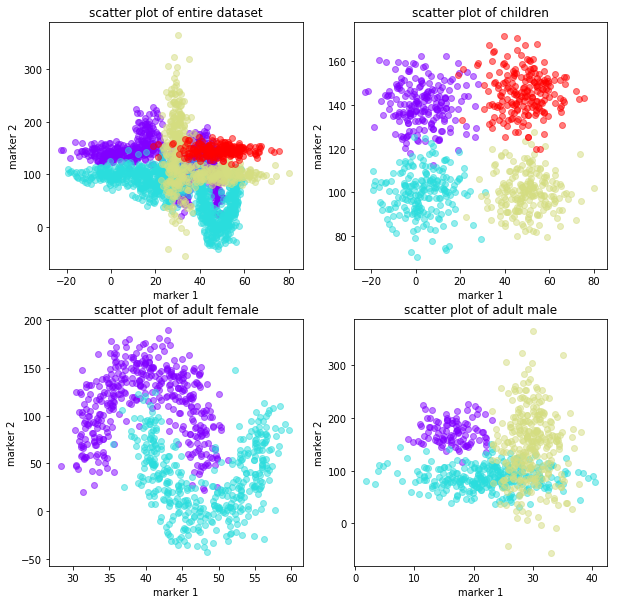

In [5]:
import matplotlib.cm as cmx
import matplotlib.colors as colors

def plot_scatter(data, title, x_lab, y_lab, ax):
    # plot data
    values = np.linspace(0, 1, 4)
    cm = plt.get_cmap('rainbow') 
    cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    
    for k in xrange(4):
        colorVal = scalarMap.to_rgba(values[k])
        ax.scatter(data[data['subtype'] == k]['marker_1'], data[data['subtype'] == k]['marker_2'], c=colorVal, alpha = 0.5)

    ax.set_title(title) 
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
plot_scatter(df, 'scatter plot of entire dataset', 'marker 1', 'marker 2', ax1)  
plot_scatter(df[df['patient_age'] < 18], 'scatter plot of children', 'marker 1', 'marker 2', ax2)  
plot_scatter(df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')], 'scatter plot of adult female', 'marker 1', 'marker 2', ax3)  
plot_scatter(df[(df['patient_age'] > 17) & (df['patient_gender'] == 'male')], 'scatter plot of adult male', 'marker 1', 'marker 2', ax4)  
plt.show()

### Part (d): Putting it All Together

Summarize and interpret the patterns in the **histograms** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric data (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Summarize and interpret the patterns in the **scatter plots** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric readings (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Do your analyses of the patterns in histograms and the scatter plots support or contradict each other? Is one of the two visualizations more useful than the other for anlyzing the relationship between biometric data and disease subtypes? If so which, and why?

Compare the descriptive stats you computed in part (b) with the visualizations. Which aspects of the visualizations (histogram and scatter plots) does each statistic measure? 

Do the stats support, contradict or enhance your visual analysis of the biometric data? 

Finally, what can you conclude, based on your visual analysis and stats, about the relationship between biometric data and diabetic subtypes in this pool of patients?

**Solution:**

---

## Problem 2: Introduction to Classification

In this problem, we will use your analysis of the relationship between biometric data and diabetic subtypes from Problem 1 to **classify** the disease subtype of new patients.

### Part (a): A Disease Subtype Classifier for Children

In the pool of child patients, compute the mean biometric data (marker 1 and marker 2) for each diabetic subtype. For a new patient between the ages of 3 and 18, we will classify the patient as the subtype whose biometric mean is most ``similar" to the patient's biometric data.

- Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

To evaluate our classifier, we can use it to classify a set of new patients whose disease subtype we already know. We measure the quality of our classifier by compute the percentage of new patients whose disease subtype we correctly classify. 

- Explain why the percentage of correct classification is a reasonable way to evaluate our classifier. What might be some shortcomings or ambiguities of this method of evaluation (**Hint:** think about the effect of the number of patients in each disease subtype, confidence level etc).

**Solution:**

In [6]:
# Subgroup children based on subtype
children_0 = df[(df['patient_age'] > 2) & (df['patient_age'] < 18) & (df['subtype']== 0)]
children_1 = df[(df['patient_age'] > 2) & (df['patient_age'] < 18) & (df['subtype']== 1)]
children_2 = df[(df['patient_age'] > 2) & (df['patient_age'] < 18) & (df['subtype']== 2)]
children_3 = df[(df['patient_age'] > 2) & (df['patient_age'] < 18) & (df['subtype']== 3)]


# Calculate mean of each marker for all subtypes
mean_marker_1_sub0 = children_0['marker_1'].mean()
mean_marker_1_sub1 = children_1['marker_1'].mean()
mean_marker_1_sub2 = children_2['marker_1'].mean()
mean_marker_1_sub3 = children_3['marker_1'].mean()

mean_marker_2_sub0 = children_0['marker_2'].mean()
mean_marker_2_sub1 = children_1['marker_2'].mean()
mean_marker_2_sub2 = children_2['marker_2'].mean()
mean_marker_2_sub3 = children_3['marker_2'].mean()

print "Mean of marker 1 for subtype 0, 1, 2, and 3: %s, %s, %s, %s" % (mean_marker_1_sub0, mean_marker_1_sub1, mean_marker_1_sub2, mean_marker_1_sub3)
print "Mean of marker 2 for subtype 0, 1, 2, and 3: %s, %s, %s, %s" % (mean_marker_2_sub0, mean_marker_2_sub1, mean_marker_2_sub2, mean_marker_2_sub3)

Mean of marker 1 for subtype 0, 1, 2, and 3: 3.27981992225, 3.32540268905, 49.942424999, 48.5218676577
Mean of marker 2 for subtype 0, 1, 2, and 3: 140.149140174, 99.7043767639, 100.196777456, 145.537334109


### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%). 

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and testing data (representing new patients), which then:

    1. computes the biometric means for subtypes using the training data 
    2. classifies the disease subtype of each new patient by comparing their biometric data to the means you've computed (i.e. compute the Euclidean distance between a new patient's biometric data and the biometric means of each disease subtype, classify the new patient as the subtype whose means is most similar in term of the Euclidean distance)


- Write a function, `evaluate`, that takes as input the actual disease subtypes for a set of patients as well as the predicted disease subtypes and computes the percentage of new patients who are correctly classified.

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

**Solution:**

In [7]:
# Randomly split children dataset into two sets: train (0.7) and test (0.3)
train = children.sample(frac = 0.7)
test = children.drop(train.index)

In [8]:
def classify(train, test):
    
    # Construct dataframe for each subtypes
    train_sub0 = train[(train['subtype'] == 0)]
    train_sub1 = train[(train['subtype'] == 1)]
    train_sub2 = train[(train['subtype'] == 2)]
    train_sub3 = train[(train['subtype'] == 3)]

    # Calculate mean of marker 1 and marker 2 for each subtype

    marker_1_sub0 = train_sub0['marker_1'].mean()
    marker_1_sub1 = train_sub1['marker_1'].mean()
    marker_1_sub2 = train_sub2['marker_1'].mean()
    marker_1_sub3 = train_sub3['marker_1'].mean()

    marker_2_sub0 = train_sub0['marker_2'].mean()
    marker_2_sub1 = train_sub1['marker_2'].mean()
    marker_2_sub2 = train_sub2['marker_2'].mean()
    marker_2_sub3 = train_sub3['marker_2'].mean()
    
    # Compare each child in the test set to the mean of two markers from the train set
    # Predict subtype of each child in the test set
    pred_subtype_list = []
    for i in range(len(test)):
        # Calculate Euclidean distance of all 4 subtypes for each patient, and find the min distance
        dist_0 = ((test.iloc[i, 1] - marker_1_sub0) ** 2 + (test.iloc[i, 2] - marker_2_sub0) ** 2) ** 0.5
        dist_1 = ((test.iloc[i, 1] - marker_1_sub1) ** 2 + (test.iloc[i, 2] - marker_2_sub1) ** 2) ** 0.5
        dist_2 = ((test.iloc[i, 1] - marker_1_sub2) ** 2 + (test.iloc[i, 2] - marker_2_sub2) ** 2) ** 0.5
        dist_3 = ((test.iloc[i, 1] - marker_1_sub3) ** 2 + (test.iloc[i, 2] - marker_2_sub3) ** 2) ** 0.5

        dist_min = min(dist_0, dist_1, dist_2, dist_3)
        
        # Determine subtype based on the minimum Euclidean distance
        pred_subtype = []
        if dist_min == dist_0:
            pred_subtype = 0
        elif dist_min == dist_1:
            pred_subtype = 1
        elif dist_min == dist_2:
            pred_subtype = 2
        elif dist_min == dist_3:
            pred_subtype = 3
        else:
            pred_subtype = 99999999
            
        pred_subtype_list.append(pred_subtype)
    return pred_subtype_list


# excute classify function and store the predicted subtype for the testing dataset in a list
pred_subtype_list = classify(train, test)
#print pred_subtype_list

In [9]:
# Define function to evaluate classification
def evaluate(pred_subtype_list, test):
    evaluation_list = []
    for i in range(len(test)):
        if test.iloc[i, 3] == pred_subtype_list[i]:
            evaluation = 1
        else:
            evaluation = 0
        evaluation_list.append(evaluation)
    return sum(evaluation_list)/float(len(test))

print "The percentage of correct classification:", evaluate(pred_subtype_list, test)*100

The percentage of correct classification: 96.6666666667


### Part (c): Further Evaluation of Our Classifier

- Create training and testing sets from the adult female patients. Use the `classify` function from Part (b) to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

- Do the same for adult male patients.

- Is our method of classifying disease subtypes valid for adult male and adult female patients (use the returned values of the `evaluate` function to support your explanation)? 

- Explain why our method of classifying disease subtypes is or is not valid for adult data. 

**Solution:**

In [10]:
# Randomly split adult female dataset into two sets: train (0.7) and test (0.3)
adult_females_train = adult_females.sample(frac = 0.7)
adult_females_test = adult_females.drop(adult_females_train.index)
adult_females_pred_subtype_list = classify(adult_females_train, adult_females_test)

print "The percentage of correct classification for adult females:", evaluate(adult_females_pred_subtype_list, adult_females_test)*100

# Randomly split adult male dataset into two sets: train (0.7) and test (0.3)
adult_males_train = adult_males.sample(frac = 0.7)
adult_males_test = adult_males.drop(adult_males_train.index)
adult_males_pred_subtype_list = classify(adult_males_train, adult_males_test)

print "The percentage of correct classification for adult males:", evaluate(adult_males_pred_subtype_list, adult_males_test)*100

The percentage of correct classification for adult females: 83.75
The percentage of correct classification for adult males: 60.9523809524


## Problem 3: More Classification

In this problem, we will explore a different way to classify the disease subtype of new patients.

### Part (a): Another Classifier

In Problem 2, we classified the disease subtype of a new patient by comparing their biometric data with the biometric means of the subtypes we compute from the training data. This time, we compare the biometric data of the new patient with the data of all the patients in the training data. We identify the patient in the training data whose biometric data is most similar (in terms of Euclidean distance) to that of the new patient. Finally, we classify the disease subtype of the new patient as that of the patient most similar to them.

Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

**Solution:**

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%).  

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and data for new patients, which then:

    1. for each new patient, identify the patient in the training set whose biometric data is the most similar to this patient 
    2. classifies the disease subtype of each new patient as the subtype of the patient most similar to them
    

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function, from Problem 2, to evaluate your classification.

- Do the same for adult male and adult female data.

**Solution:**

In [11]:
# Randomly split children dataset into two sets: train (0.7) and test (0.3)
train = children.sample(frac = 0.7)
test = children.drop(train.index)

In [12]:
def classify_p3(train, test): 
    # Calculate Euclidean distance between the biometric data of each new patient to 
    # all patients in the train dataset
    
    predicted_subtype_list = [] 

    for i in range(len(test)):
        euclidean_distance_list = []
        for j in range(len(train)):
            euclidean_distance = ((test.iloc[i, 1] - train.iloc[j, 1]) ** 2 + (test.iloc[i, 2] - train.iloc[j, 2]) ** 2) ** 0.5
            euclidean_distance_list.append(euclidean_distance)

        # find the minimum euclidean distance
        euclidean_distance_min = min(euclidean_distance_list)

        # find the subtype of patient in the training set who is associated with the minimum distance

        for j in range(len(train)):
            if euclidean_distance_list[j] == euclidean_distance_min:
                predicted_subtype_list.append(train.iloc[j, 3])
    return predicted_subtype_list

predicted_subtype_list = classify_p3(train, test)
print "The percentage of correct classification for children:", evaluate(predicted_subtype_list, test)

The percentage of correct classification for children: 0.966666666667


In [13]:
# Randomly split adult female dataset into two sets: train (0.7) and test (0.3)
adult_females_train = adult_females.sample(frac = 0.7)
adult_females_test = adult_females.drop(adult_females_train.index)
adult_females_predicted_subtype_list = classify_p3(adult_females_train, adult_females_test)

print "The percentage of correct classification for adult females:", evaluate(adult_females_predicted_subtype_list, adult_females_test)*100

# Randomly split adult male dataset into two sets: train (0.7) and test (0.3)
adult_males_train = adult_males.sample(frac = 0.7)
adult_males_test = adult_males.drop(adult_males_train.index)
adult_males_predicted_subtype_list = classify_p3(adult_males_train, adult_males_test)

print "The percentage of correct classification for adult males:", evaluate(adult_males_predicted_subtype_list, adult_males_test)*100

The percentage of correct classification for adult females: 96.25
The percentage of correct classification for adult males: 85.7142857143


### Part (c): Comparison of Classifiers

Compare the performance of the classifier you implemented in Part (b) with the one from Problem 2.

Which classifier does a better job on the child patient data? Explain why, using your analysis of the dataset from Problem 1. 

Answer the above question for the adult male and adult female data.

**Solution:**

---

## Challenge Problem: US Voting Data (by Age and Sex)
**(Required for AC 209A Students)**

In this problem, you will perform preliminary data exploration and visualization of some real voting data. 

**Note:** You are now working with real-life data, so be cautious regarding data type, data format and data quality.

### Part (a): Downloading and Understanding the Data

Download Table 1 from the [US Census Bereau](http://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-577.html). This is an excel file (do not perform any analysis using Microsoft Excel). 

Load the data into a Python data structure.

Write a brief summary describing what information is included in this dataset (provide evidence to support your summary).

**Solution:**

In [14]:
#Read voting data into python as a pandas dataframe
df = pd.read_excel('table01.xls')

#df.loc[2:8, :]

### Part (b): What's the Story?

Perform data exploration and identify as well as describe the major trends in this data set. Use your computations and visualizations effecitively and specifically to support your analysis, hypothesis and conclusions. Your analysis must include relationships between age, sex and reported percentage of voter registration, reported voting.

**Solution:**

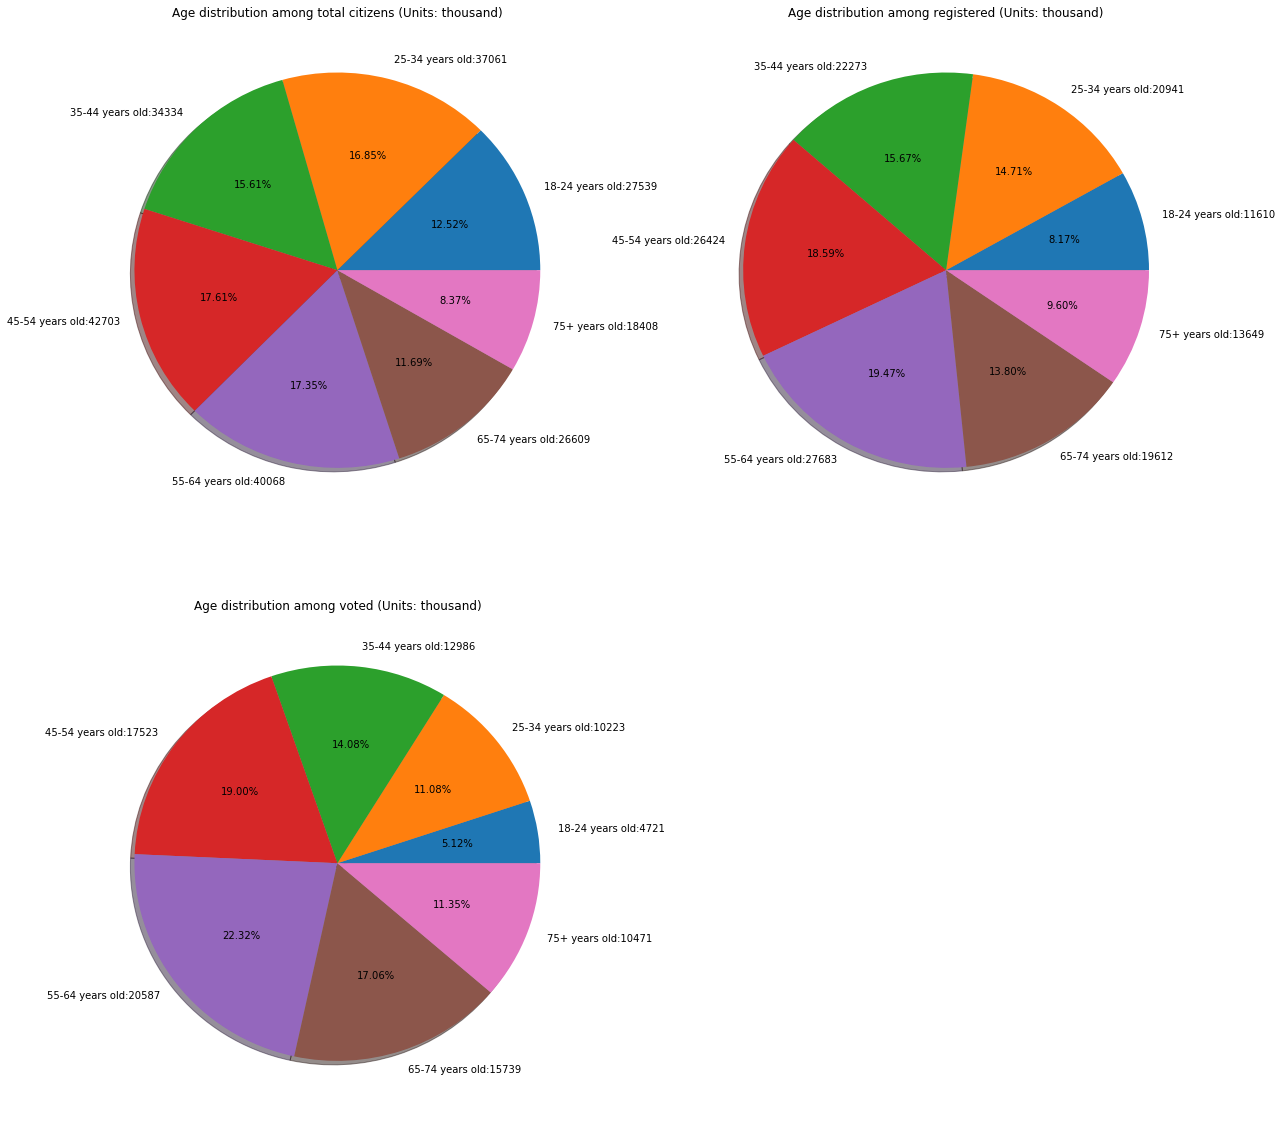

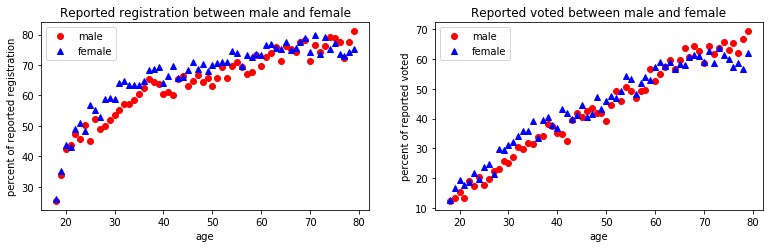

In [15]:
column_names = ['total_population', 'total_citizen_population', 'reported_regist_num', 'reported_regist_percent', 
                'reported_not_regist_num', 'reported_not_regist_percent', 'no_response_to_registration_num', 
                'no_response_to_registration_percent', 'reported_voted_num', 'reported_voted_percent', 'reported_did_not_vote_num',
               'reported_did_not_vote_percent', 'no_response_to_voting_num', 'no_response_to_voting_percent',
               'total_pop_reported_registered_num', 'total_pop_reported_voted_percent']


# Summary of dataset of both sex grouped by age.
summary_data = df.iloc[8:16, 1:17]
summary_data.columns = [column_names]
age_group_name = ['18+ years old', '18-24 years old', '25-34 years old', '35-44 years old', 
                  '45-54 years old', '55-64 years old', '65-74 years old', '75+ years old']
summary_data.insert(0, 'age_group', age_group_name)


# Pie chart to show age distribution among total citizens, total registered, and total voted
fig_sum = plt.figure(figsize=(20, 20))

ax1 = fig_sum.add_subplot(221)
ax1.pie(summary_data.total_citizen_population[1:8], labels = ['18-24 years old:' + str(27539), 
                                                              '25-34 years old:' + str(37061), 
                                                             '35-44 years old:' + str(34334),
                                                             '45-54 years old:' + str(42703),
                                                             '55-64 years old:' + str(40068),
                                                             '65-74 years old:' + str(26609),
                                                             '75+ years old:' + str(18408)], 
        autopct ='%.2f%%', shadow = True)
title = ax1.set_title('Age distribution among total citizens (Units: thousand)')

ax2 = fig_sum.add_subplot(222)
ax2.pie(summary_data.reported_regist_num[1:8], labels = ['18-24 years old:' + str(11610), 
                                                              '25-34 years old:' + str(20941), 
                                                             '35-44 years old:' + str(22273),
                                                             '45-54 years old:' + str(26424),
                                                             '55-64 years old:' + str(27683),
                                                             '65-74 years old:' + str(19612),
                                                             '75+ years old:' + str(13649)], 
        autopct ='%.2f%%', shadow = True)
title = ax2.set_title('Age distribution among registered (Units: thousand)')

ax3 = fig_sum.add_subplot(223)
ax3.pie(summary_data.reported_voted_num[1:8], labels = ['18-24 years old:' + str(4721), 
                                                              '25-34 years old:' + str(10223), 
                                                             '35-44 years old:' + str(12986),
                                                             '45-54 years old:' + str(17523),
                                                             '55-64 years old:' + str(20587),
                                                             '65-74 years old:' + str(15739),
                                                             '75+ years old:' + str(10471)], 
        autopct ='%.2f%%', shadow = True)
title = ax3.set_title('Age distribution among voted (Units: thousand)')

#Create three dataframes corresponding to both sex, male, and female 

both_sex = df.iloc[17:79, 1:17]
both_sex.columns = [column_names]
both_sex.insert(0, 'age', range(18, 80))

male = df.iloc[93:155, 1:17]
male.columns = [column_names]
male.insert(0, 'age', range(18, 80))

female = df.iloc[169:231, 1:17]
female.columns = [column_names]
female.insert(0, 'age', range(18, 80))

# Curves showing trend of voter registration and reported voting across ages. 
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(531)
ax1.plot(male.age, male.reported_regist_percent, 'ro', label = 'male')
ax1.plot(female.age, female.reported_regist_percent, 'b^', label = 'female')
ax1.legend(loc='upper left')
xlabel = ax1.set_xlabel('age')
ylabel = ax1.set_ylabel('percent of reported registration')
title = ax1.set_title('Reported registration between male and female')

ax2 = fig.add_subplot(532)
ax2.plot(male.age, male.reported_voted_percent, 'ro', label = 'male')
ax2.plot(female.age, female.reported_voted_percent, 'b^', label = 'female')
ax2.legend(loc='upper left')
xlabel = ax2.set_xlabel('age')
ylabel = ax2.set_ylabel('percent of reported voted')
title = ax2.set_title('Reported voted between male and female')



### Part (c): What's Next?

Based on your analysis in part (c), what types of interesting questions or tasks could you ask of or perform with this data (explain your answer)? What additional data do you anticipate needing in order to answer these questions/perform these tasks (explain your answer)?

**Solution:**